In [1]:
pip install tensorflow pandas numpy matplotlib scikit-learn


   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.8/385.2 MB 2.1 MB/s eta 0:03:04
   ---------------------------------------- 1.3/385.2 MB 2.3 MB/s eta 0:02:46
   ---------------------------------------- 1.8/385.2 MB 2.3 MB/s eta 0:02:44
   ---------------------------------------- 2.4/385.2 MB 2.2 MB/s eta 0:02:52
   ---------------------------------------- 2.6/385.2 MB 2.2 MB/s eta 0:02:53
   ---------------------------------------- 3.1/385.2 MB 2.2 MB/s eta 0:02:54
   ---------------------------------------- 3.7/385.2 MB 2.2 MB/s eta 0:02:52
   ---------------------------------------- 4.2/385.2 MB 2.2 MB/s eta 0:02:53
   ---------------------------------------- 4.7/385.2 MB 2.2 MB/s eta 0:02:51
    --------------------------------------- 5.0/385.2 MB 2.2 MB/s eta 0:02:54
    --------------------------------------- 5.5/385.2 MB 2.2 MB/s eta 0:02:55


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import LabelEncoder

In [1]:
pip show tensorflow


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Load the data from the CSV file
data_transient = pd.read_csv('LO_NL_Transient_P2.csv')
data_nd = pd.read_csv('LO_NL_ND_P2.csv')

# Label the datasets
data_transient['Category'] = 'Transient'
data_nd['Category'] = 'ND'



# Combine both datasets
combined_data = pd.concat([data_transient, data_nd])

# Encode the 'Category' column to numerical labels
label_encoder = LabelEncoder()
combined_data['Category'] = label_encoder.fit_transform(combined_data['Category'])

# Separate features and labels
X = combined_data[['Sample', 'Value']].values  # Features: Sample and Value
y = combined_data['Category'].values 


In [3]:
num_rows = combined_data.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 1838113


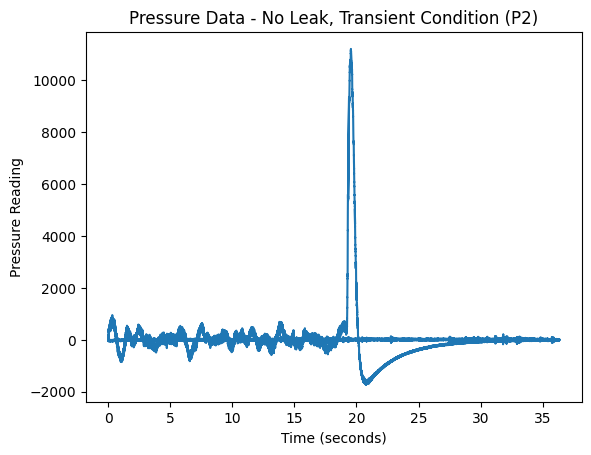

In [7]:
plt.plot(combined_data['Sample'], combined_data['Value'])
plt.title('Pressure Data - No Leak, Transient Condition (P2)')
plt.xlabel('Time (seconds)')
plt.ylabel('Pressure Reading')
plt.show()


In [10]:
# Define a function to create sequences for classification
def create_sequences_for_classification(data, window_size=50):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data['Value'][i:i+window_size].values)
        y.append(data['Category'][i+window_size])  # Use the category at the end of the window
    return np.array(X), np.array(y)



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 1), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\THARUKA\anaconda3\envs\Research_Project_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [14]:
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/8
45953/45953 ━━━━━━━━━━━━━━━━━━━━ 105s 2ms/step - accuracy: 0.9313 - loss: 0.1864 - val_accuracy: 0.9375 - val_loss: 0.1649
Epoch 2/8
45953/45953 ━━━━━━━━━━━━━━━━━━━━ 100s 2ms/step - accuracy: 0.9389 - loss: 0.1599 - val_accuracy: 0.9397 - val_loss: 0.1568
Epoch 3/8
45953/45953 ━━━━━━━━━━━━━━━━━━━━ 101s 2ms/step - accuracy: 0.9401 - loss: 0.1553 - val_accuracy: 0.9419 - val_loss: 0.1536
Epoch 4/8
45953/45953 ━━━━━━━━━━━━━━━━━━━━ 99s 2ms/step - accuracy: 0.9408 - loss: 0.1531 - val_accuracy: 0.9432 - val_loss: 0.1469
Epoch 5/8
45953/45953 ━━━━━━━━━━━━━━━━━━━━ 103s 2ms/step - accuracy: 0.9413 - loss: 0.1516 - val_accuracy: 0.9422 - val_loss: 0.1474
Epoch 6/8
45953/45953 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step - accuracy: 0.9420 - loss: 0.1496 - val_accuracy: 0.9433 - val_loss: 0.1457
Epoch 7/8
45953/45953 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.9429 - loss: 0.1479 - val_accuracy: 0.9424 - val_loss: 0.1474
Epoch 8/8
45953/45953 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.94

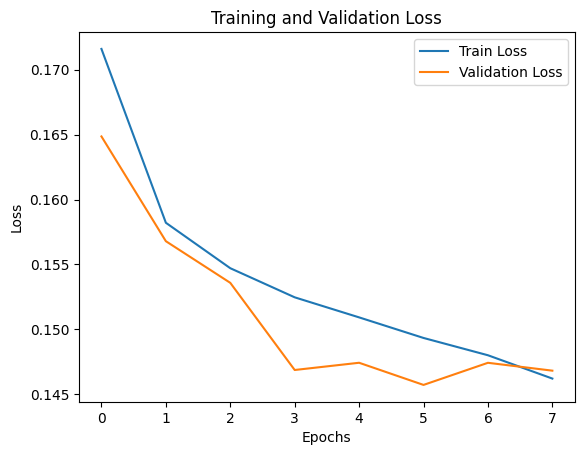

In [15]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
predictions = model.predict(X_test)


11489/11489 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


In [17]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


11489/11489 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9438 - loss: 0.1462
Test Accuracy: 94.36%


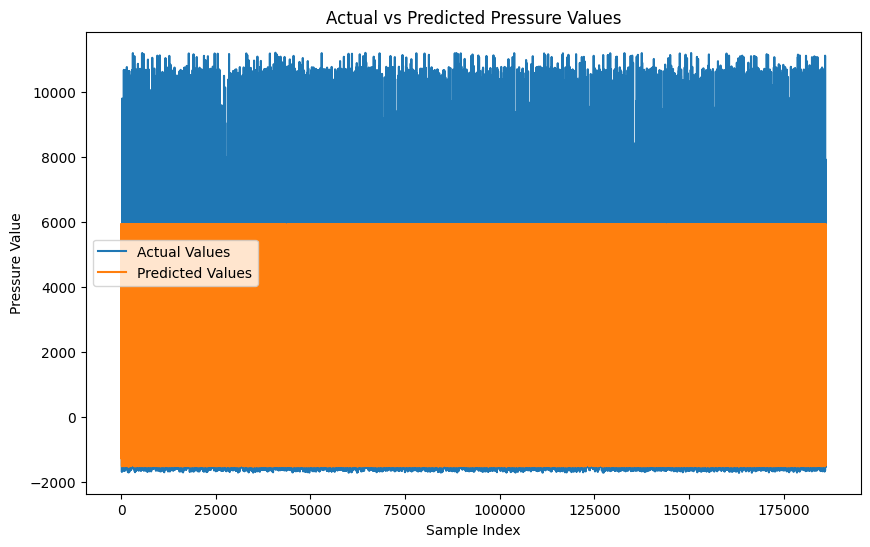

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Actual vs Predicted Pressure Values')
plt.xlabel('Sample Index')
plt.ylabel('Pressure Value')
plt.legend()
plt.show()
